<a href="https://colab.research.google.com/github/TommyClaveau/modelDeforestation/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://githubtocolab.com/BioWar/Satellite-Image-Segmentation-using-Deep-Learning-for-Deforestation-Detection/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [57]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 1. Load an image
# Replace 'path/to/your/image.png' with the actual path to your image file
image_path = 'paf.png' # Corrected image path
image = Image.open(image_path)

# 2. Preprocess the image
# Resize the image to the expected input size of the model (e.g., 512x512)
target_size = (512, 512)
resized_image = image.resize(target_size)

# Convert the image to a NumPy array and normalize
image_np = np.asarray(resized_image, dtype="float32") / 255.0

# Expand dimensions to match the model's input shape (add batch dimension)
image_np = np.expand_dims(image_np, axis=0)

# 3. Load the model
# The model was loaded in cell aoQ6iRYnklPV as 'model_categorical'
# If you need to load a different model, uncomment the following line
# model = tf.keras.models.load_model("path/to/your/model.h5")
model = model_categorical # Using the model already loaded in the notebook

# 4. Make a prediction
prediction = model.predict(image_np)

# The output of the model is likely a probability map for each class.
# To get the final segmentation mask, we take the argmax along the last axis.
predicted_mask = np.argmax(prediction, axis=-1)

# Remove the batch dimension
predicted_mask = np.squeeze(predicted_mask, axis=0)

# 5. Visualize the result
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(resized_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Display the predicted mask
# You might need to map the class indices back to colors for visualization
# For now, we'll display the raw class indices
axes[1].imshow(predicted_mask, cmap='viridis') # Use a colormap to visualize the mask
axes[1].set_title("Predicted Mask")
axes[1].axis("off")

plt.tight_layout()
plt.show()

NameError: name 'model_categorical' is not defined

# Dataset Analysis

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
!pip install selenium

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# X_name, Y_name = "X__balanced.npy", "Y__balanced.npy"
# X, Y = np.load(X_name), np.load(Y_name)
# print(f"[INFO] X.shape = {X.shape}, Y.shape = {Y.shape}")

In [ ]:
from PIL import Image
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def load_raw_images(y_path):
    Y = []
    for filename in os.listdir(y_path):
        if filename.endswith("png"):
            Y.append(filename)
    return Y

def load_test_images(path):
    images = load_raw_images(path)
    np_images = []
    for image in images:
        im_x = Image.open(f"{path}/{image}")
        im_x_np = np.asarray(im_x, dtype="float32") / 255.0
        np_images.append(im_x_np)
    return np_images

def count_pixels(image):
    red, green, blue = (226, 19, 15), (11, 195, 72), (51, 15, 200)
    colors = {"red": 0, "green": 0, "blue": 0}
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i][j]
            pixel = np.round(pixel*255).astype('int32')
            if (pixel == red).all():
                colors["red"] += 1
            elif (pixel == blue).all():
                colors["blue"] += 1
            elif (pixel == green).all():
                colors["green"] += 1
    return colors

def get_pixel_data(Y):
    quantity = Y.shape[0]
    print(f"[INFO] Get pixels from {quantity} images.")
    colors_global = {"red": 0, "green": 0, "blue": 0}
    df = pd.DataFrame(data=np.zeros((quantity, 3)), columns=['red', 'green', 'blue'])
    for i, image in enumerate(Y):
        print(f"[INFO] Image {i+1}/{quantity}")
        colors = count_pixels(image)
        for color, value in colors.items():
            colors_global[color] += value
            df.loc[i][color] = value
    print("[INFO] Count complete.")
    return colors_global, df

def get_dataset_metadata(X, Y):
    size = X.shape[0]
    height, width = X.shape[1:3]
    channels = X.shape[3]
    parameters = {"size": size,
                  "height": height,
                  "width": width,
                  "channels": channels}
    for parameter, value in parameters.items():
        print(f"[INFO] {parameter} => {value}")

def display(X, Y, name):
    fig, ax = plt.subplots(ncols=2,
                           nrows=X.shape[0],
                           figsize=(X.shape[0]*5, X.shape[0]*8),
                           sharex=True, sharey=True)
    x_ax = []
    df_ax = pd.DataFrame.from_records(ax)
    # Plot initial images
    for i, im in enumerate(X):
        df_ax.iloc[i][0].imshow(im)
        df_ax.iloc[i][0].set_xticklabels([])
        df_ax.iloc[i][0].set_yticklabels([])
        if i == 0:
            df_ax.iloc[i][0].set_title(f'Satellite Images 512x512 pixels', fontsize=20)
    for i, im in enumerate(Y):
        df_ax.iloc[i][1].imshow(im)
        df_ax.iloc[i][1].set_xticklabels([])
        df_ax.iloc[i][1].set_yticklabels([])
        if i == 0:
            df_ax.iloc[i][1].set_title(f'RGB Segmentation Mask', fontsize=20)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(name)
    plt.show()

In [ ]:
Y = load_test_images("/content/gdrive/MyDrive/dataset_08_04_2021/data_shaffled_8_04_2021/masks")
X = load_test_images("/content/gdrive/MyDrive/dataset_08_04_2021/data_shaffled_8_04_2021/images")

In [ ]:
Y_np = np.array(Y)
X_np = np.array(X)

In [ ]:
Y_np.shape

(322, 512, 512, 3)

In [ ]:
# colors, df = get_pixel_data(Y_np[:])

In [ ]:
colors, df = get_pixel_data(Y_np[:])
# {'blue': 9762135, 'green': 65196659, 'red': 9451534}
colors, df

[INFO] Get pixels from 322 images.
[INFO] Image 1/322


/tmp/ipython-input-2934379284.py:49: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.loc[i][color] = value


[INFO] Image 2/322


KeyboardInterrupt: 

In [ ]:
s = 0
for k, v in colors.items():
  s += v
s - 322*512*512

In [ ]:
df.to_csv("/content/gdrive/MyDrive/dataset_08_04_2021/dataframe_322.csv")

In [ ]:
df.to_csv("dataframe_144.csv")
df = pd.read_csv("dataframe_144.csv")
df = df.loc[:][['red', 'green', 'blue']]
df

In [ ]:
#colors          = {'red': 3878379, 'green': 32288939, 'blue': 1581227}
colors_balanced = {'red': 5412925, 'green': 34175495, 'blue': 3140800}
X = np.array(X)
Y = np.array(Y)
get_dataset_metadata(X, Y), colors_balanced

In [ ]:
start = 58
display(X_np[start:start+3], Y_np[start:start+3], name="Images_and_masks.png")

In [ ]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
from bokeh.resources import INLINE
from bokeh.io import export_png

output_notebook(resources=INLINE)

# Example colors dictionary
colors = {'red': 5412925, 'green': 34175495, 'blue': 3140800}

fruits = ['Forest', 'Deforestation', 'Other']
counts = [colors['green'], colors['red'], colors['blue']]

source = ColumnDataSource(data=dict(
    fruits=fruits,
    counts=counts,
    color=['green', 'red', 'blue']
))

p = figure(
    x_range=fruits,
    y_range=(10 ** 0, 10 ** 9),
    height=550,
    width=850,
    title="Classes Distribution (log scale)",
    toolbar_location=None,
    tools="",
    y_axis_type="log"
)

p.vbar(x='fruits', top='counts', width=0.8, color='color', legend_field="fruits", source=source, bottom=0.1)

p.xgrid.grid_line_color = None
p.title.text_font_size = '20pt'
p.legend.label_text_font_size = '16pt'
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

# Optional: export to PNG
# export_png(p, filename="/content/gdrive/MyDrive/Dataset/dataset_08_04_2021/Data_distribution_log.png")

show(p)


In [ ]:
def display_with_masks(X, Y, name, alpha=0.45):
    fig, ax = plt.subplots(ncols=X.shape[0]//2,
                           nrows=2,
                           figsize=(X.shape[0]*5, X.shape[0]*5),
                           sharex=True, sharey=True)
    x_ax = []
    df_ax = pd.DataFrame.from_records(ax)
    # Plot initial images
    counter = 0
    for j in range(2):
        for i in range(X.shape[0]//2):
            if i+j == 0:
                df_ax.iloc[i][j].set_title(f"Images merged with masks (alpha={alpha})", fontsize=20)
            im = X[counter] + Y[counter] * alpha
            df_ax.iloc[j][i].imshow(im)
            df_ax.iloc[j][i].set_xticklabels([])
            df_ax.iloc[j][i].set_yticklabels([])
            counter += 1

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(name)
    plt.show()

In [ ]:
display_with_masks(X[:4], Y[:4], name="Images_merged_masks.png")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2)
sns.set_theme(style="whitegrid")

plt.figure(figsize=(30, 8))
plt.title("Boxplot of areas")

df.columns = ["Deforestation", "Forest", "Other"]

box = sns.boxplot(data=df, orient='h', order=["Forest", "Deforestation", "Other"])

# Each box is now a Patch in box.patches
colors = ['green', 'red', 'blue']
for patch, color in zip(box.patches, colors):
    patch.set_facecolor(color)

box.set_xscale("log")
plt.tight_layout()
plt.savefig("/content/gdrive/MyDrive/dataset_08_04_2021/Whiskers_area_distribution.png")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Font settings
font = {'size': 22}
mpl.rc('font', **font)

# Figure setup
plt.figure(figsize=(30, 8))
plt.title("Boxplot of areas")
sns.set_theme(style="whitegrid")

# Rename columns
df.columns = ["Deforestation", "Forest", "Other"]

# Create boxplot
ax = sns.boxplot(data=df, orient='h', order=["Forest", "Deforestation", "Other"])

# ✅ Modern way: color boxes via patches
colors = ['green', 'red', 'blue']
labels = ['Forest', 'Deforestation', 'Other']

for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)

# Optional: add custom legend
for color, label in zip(colors, labels):
    plt.scatter([], [], color=color, label=label)
plt.legend(loc='upper right', fontsize=20, title="Classes")

# Log scale and save
ax.set_xscale("log")
plt.tight_layout()
plt.savefig("Whiskers_area_distribution.png")
plt.show()


In [ ]:
size=[df["Forest"].sum()//df.shape[0], df["Deforestation"].sum()//df.shape[0], df["Other"].sum()//df.shape[0]]
my_sum = sum(size)
percents = [str(round((i/my_sum)*100))+"%" for i in size]
names=[f"Forest, {percents[0]}", f"Deforestation, {percents[1]}", f"Other, {percents[2]}"]

plt.figure(figsize=(12, 10))
# Create a circle for the center of the plot
my_circle=plt.Circle((0,0), 0.7, color='white')

# Custom colors --> colors will cycle
plt.title("Average percentage of class area per image", fontsize = 20)
plt.pie(size, labels=names, colors=['green','red','blue'], textprops={'fontsize': 16})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig("Average_percentage_of_class_area_per_image.png")
plt.show()

In [ ]:
size=[df["Forest"].sum()//df.shape[0], df["Deforestation"].sum()//df.shape[0], df["Other"].sum()//df.shape[0]]
my_sum = sum(size)
percents = [str(round((i/my_sum)*100))+"%" for i in size]
names=[f"Forest, {percents[0]}", f"Deforestation, {percents[1]}", f"Other, {percents[2]}"]

plt.figure(figsize=(12, 10))
# Create a circle for the center of the plot
my_circle=plt.Circle((0,0), 0.7, color='white')

# Custom colors --> colors will cycle
plt.title("Average percentage of class area per image", fontsize = 20)
plt.pie(size, labels=names, colors=['green','red','blue'], textprops={'fontsize': 16})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig("/content/gdrive/MyDrive/dataset_08_04_2021/Average_percentage_of_class_area_per_image.png")
plt.show()

# Model analysis

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.utils import plot_model

# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True
# sess = tf.compat.v1.Session(config=config)

import matplotlib.pyplot as plt
import numpy as np
from numba import cuda
import datetime
import pandas as pd
import seaborn as sns

In [59]:
model_categorical = tf.keras.models.load_model("/content/gdrive/MyDrive/U6_E_1201-F1_0.7134-IOU_0.6555.h5")

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 1. Load an image
# Replace 'path/to/your/image.png' with the actual path to your image file
image_path = 'paf.png' # Corrected image path
image = Image.open(image_path)

# 2. Preprocess the image
# Resize the image to the expected input size of the model (e.g., 512x512)
target_size = (512, 512)
resized_image = image.resize(target_size)

# Convert the image to a NumPy array and normalize
image_np = np.asarray(resized_image, dtype="float32") / 255.0

# Expand dimensions to match the model's input shape (add batch dimension)
image_np = np.expand_dims(image_np, axis=0)

# 3. Load the model
# The model was loaded in cell aoQ6iRYnklPV as 'model_categorical'
# If you need to load a different model, uncomment the following line
# model = tf.keras.models.load_model("path/to/your/model.h5")
model = model_categorical # Using the model already loaded in the notebook

# 4. Make a prediction
prediction = model.predict(image_np)

# The output of the model is likely a probability map for each class.
# To get the final segmentation mask, we take the argmax along the last axis.
predicted_mask = np.argmax(prediction, axis=-1)

# Remove the batch dimension
predicted_mask = np.squeeze(predicted_mask, axis=0)

# 5. Visualize the result
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(resized_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Display the predicted mask
# You might need to map the class indices back to colors for visualization
# For now, we'll display the raw class indices
axes[1].imshow(predicted_mask, cmap='viridis') # Use a colormap to visualize the mask
axes[1].set_title("Predicted Mask")
axes[1].axis("off")

plt.tight_layout()
plt.show()

ValueError: No model config found in the file at /content/gdrive/MyDrive/U6_E_1201-F1_0.7134-IOU_0.6555.h5.

In [ ]:
summary_str = model_final.summary()

In [ ]:
# import json

# config_json_dict = model_final.get_config()
# config_json_dict
# config_json = json.dumps(config_json_dict)
# df_config = pd.read_json(config_json)
# df_config
# config_json
# df_res.iloc[-1][-1]
# df_res['Rolling']

In [ ]:
df_res = pd.read_csv("/content/gdrive/MyDrive/Metrics/model_tpu_2048_16_v5/results_model_tpu_2048_16_v5.csv")
df_res = df_res.reset_index(drop=True)
df_res['Rolling_F1_Score'] = df_res['test_f1score'].rolling(100).mean()
df_res['Rolling_IoU'] = df_res['test_iou'].rolling(100).mean()
# df_res.fillna(0, inplace=True)
columns = df_res.columns
# df_res = df_res.reindex(columns=columns)
df_res

In [ ]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(40, 10),
                      )
df_res.plot(kind='line', y=['test_f1score', 'train_f1score', 'Rolling_F1_Score'], ax=ax, grid=True, linewidth=3)
ax.set_title("F1_Score", fontsize=24)
ax.legend(prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("/content/gdrive/MyDrive/dataset_08_04_2021/F1_score_v5.png")
plt.show()
df_res.iloc[-1][-1]

In [ ]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(40, 10),
                      )
df_res.plot(kind='line', y=['train_loss'], ax=ax, grid=True, linewidth=3)
ax.set_title("Train Loss", fontsize=24)
ax.legend(prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("/content/gdrive/MyDrive/dataset_08_04_2021/Train_loss_v5.png")
plt.show()
df_res.iloc[-1][-1]

In [ ]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(40, 10),
                      )
df_res.plot(kind='line', y=['train_iou', 'test_iou', 'Rolling_IoU'], ax=ax, grid=True, linewidth=3)
ax.set_title("IoU", fontsize=24)
ax.legend(prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("/content/gdrive/MyDrive/dataset_08_04_2021/IoU_v5.png")
plt.show()
df_res.iloc[-1][-1]

In [ ]:
df_categorical = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_categorical_crossentropy_v1_u1.csv", index_col="epoch")
df_dice = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_dice_coef_multilabel_v1_u1.csv", index_col="epoch")
df_tversky = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_Tvesky_v1_u1.csv", index_col="epoch")
df_hybrid = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_hybrid_v1_u1.csv", index_col="epoch")
df_hybrid1 = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_hybrid_v1_u1.csv", index_col="epoch")
df_hybrid2 = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_hybrid_v2_u1.csv", index_col="epoch")
df_hybrid3 = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_hybrid_v3_u1.csv", index_col="epoch")
df_hybrid4 = pd.read_csv("backup_csv/New_loss_functions/results_model_one_hot_hybrid_v4_u1.csv", index_col="epoch")
df_w = pd.read_csv("backup_csv/New_loss_functions/results_model_weighted_v1_u1.csv", index_col="epoch")
df_w2 = pd.read_csv("backup_csv/New_loss_functions/results_model_weighted_v1_u2.csv", index_col="epoch")
df_wb1 = pd.read_csv("backup_csv/New_loss_functions/results_model_weighted_balanced_v1_u1.csv", index_col="epoch")


dfs = [df_wb1.drop(['f1_m', 'val_f1_m'], axis=1), df_w2, df_hybrid4]
df_concat = pd.concat(dfs, axis=1)
# df_wb1.loc[:, df_wb1.columns not in ['f1_m', 'val_f1_m']]
# df_wb1.drop(['f1_m', 'val_f1_m'], axis=1)
df_concat

In [ ]:
def plot_csv(dfs, names, metrics, savename):
    ncols = 1
    columns = dfs[0].columns
    print(f"[INFO] Available columns ({len(columns)}): {columns}.\n")
    nrows = len(columns)//2
    fig, ax = plt.subplots(ncols=ncols,
                           nrows=nrows,
                           figsize=(30, 30),
                           #sharex=True
                          )
    df_concat = pd.concat(dfs, axis=1)
    columns_new = []
    columns_grouped = []

    for name in names:
        for metric in dfs[0].columns:
            columns_new.append(f"{metric}_{name.title()}")

    for i, metric in enumerate(metrics):
        metric_columns = [metric, 'val_' + metric]
        metric_columns = metric_columns * len(dfs)
        new_labels = [label + "_" + ending.title() for label, ending in zip(metric_columns, names * len(dfs))]
        columns_grouped.append(new_labels)

    print(f"[INFO] Possible columns ({len(columns_new)}): {columns_new}.\n")
    print(f"[INFO] Columns grouped ({len(columns_grouped)}): {columns_grouped}.\n")

    df_concat.columns = columns_new
    print(f"[INFO] New columns ({len(df_concat.columns)}): {df_concat.columns}\n")
    for i, sublist in enumerate(columns_grouped):
        ax[i].set_title(metrics[i].title(), fontsize=24)
        ax[i].set_xlim(xmin=0, xmax=100)
        #sns.lineplot(data=df_concat[sublist], ax=ax[i])
        for column in sublist:
#             if "val" in column and "Hybrid" in column:
#                 df_concat.plot(kind='line', y=column, ax=ax[i], grid=True, style='--', linewidth=7, color='lime')
            if "val" in column:
                df_concat.plot(kind='line', y=column, ax=ax[i], grid=True, style='--', linewidth=3)
#                 df_concat.plot(kind='line', y=column, ax=ax[i], grid=True, color='red', linewidth=4)
            else:
                df_concat.plot(kind='line', y=column, ax=ax[i], grid=True)
        print(sublist)
    if savename:
        plt.savefig("Different_losses_one_arch.png", dpi=300)
    plt.show()

In [ ]:
# df_hybrid

In [ ]:
import matplotlib as mpl
font = {'size'   : 22}

mpl.rc('font', **font)

plot_csv(dfs, names=["weighted_balanced","weighted2", "hybrid4"], metrics=["accuracy" , "iou", "loss"], savename=None)

In [ ]:
# fig, ax = plt.subplots(ncols=1,
#                        nrows=3,
#                        figsize=(10, 30))
# ax[0].set_title("Accuracy", fontsize=24)
# ax[1].set_title("Loss", fontsize=24)
# ax[2].set_title("IoU", fontsize=24)
# lp_acc = sns.lineplot(data=df_res[['accuracy', 'val_accuracy']], ax=ax[0])
# lp_loss = sns.lineplot(data=df_res[['loss', 'val_loss']], ax=ax[1])
# lp_iou = sns.lineplot(data=df_res[['iou', 'val_iou']], ax=ax[2])
# plt.savefig("Accuracy_loss_2.png")
# plt.show()

### CamVid dataset

In [ ]:
!wget https://github.com/alexgkendall/SegNet-Tutorial/blob/master/CamVid/testannot/0001TP_008790.png

--2025-10-24 15:23:15--  https://github.com/alexgkendall/SegNet-Tutorial/blob/master/CamVid/testannot/0001TP_008790.png
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘0001TP_008790.png’

0001TP_008790.png       [ <=>                ] 205.37K  --.-KB/s    in 0.05s   

2025-10-24 15:23:15 (4.05 MB/s) - ‘0001TP_008790.png’ saved [210301]



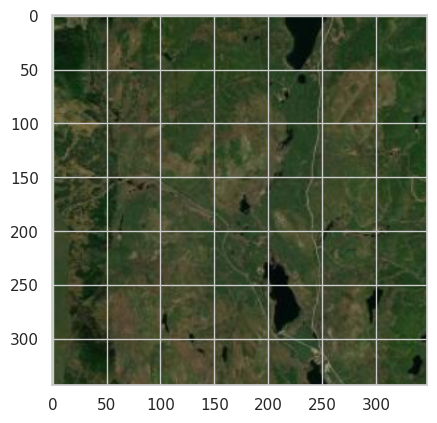

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("paf.png")
plt.imshow(img)
plt.show()